# Distinguish Your Own Digits (DYOD)

You are going to write a classifier that distinguishes between the number 3 and number 8.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

From the command line run `pip install mnist`. This is a library that will help you bring down the mnist dataset. If you run this from a notebook, you need to put  `!pip install mnist` in a cell by itself.

In [3]:
!pip install mnist

## Preparing the Data

In [4]:
import mnist

In [5]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

In [6]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [7]:
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [8]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

2


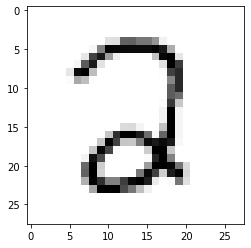

In [9]:
image_index = 7776 # You may select anything up to 60,000
print(train_labels[image_index]) 
plt.imshow(train_images[image_index], cmap='Greys')

## Filter data to get 3 and 8 out

In [10]:
train_filter = np.where((train_labels == 3 ) | (train_labels == 8))
test_filter = np.where((test_labels == 3) | (test_labels == 8))
X_train, y_train = train_images[train_filter], train_labels[train_filter]
X_test, y_test = test_images[test_filter], test_labels[test_filter]

We normalize the pizel values in the 0 to 1 range

In [11]:
X_train = X_train/255.
X_test = X_test/255.

And setup the labels as 1 (when the digit is 3) and 0 (when the digit is 8)

In [12]:
y_train = 1*(y_train==3)
y_test = 1*(y_test==3)

In [13]:
X_train.shape, X_test.shape

((11982, 28, 28), (1984, 28, 28))

We reshape the data to flatten the image pixels into a set of features or co-variates:

In [14]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train.shape, X_test.shape

((11982, 784), (1984, 784))

In [15]:
#Impoting functions from 'Kudzu'
from kudzu.model import Model
from kudzu.train import Learner
from kudzu.optim import GD
from kudzu.data import Data, Sampler,Dataloader

from kudzu.callbacks import AccCallback
from kudzu.callbacks import ClfCallback

from kudzu.loss import MSE

from kudzu.layer import Sigmoid,Relu
from kudzu.layer import Affine

### Let us create a `Config` class, to store important parameters. 
This class essentially plays the role of a dictionary.

In [16]:
class Config:
    pass
config = Config()
config.lr = 0.001
config.num_epochs = 250
config.bs = 50

### Running Models with the Training data
Details about the network layers:
- A first affine layer has 784 inputs and does 100 affine transforms. These are followed by a Relu
- A second affine layer has 100 inputs from the 100 activations of the past layer, and does 100 affine transforms. These are followed by a Relu
- A third affine layer has 100 activations and does 2 affine transformations to create an embedding for visualization. There is no non-linearity here.
- A final "logistic regression" which has an affine transform from 2 inputs to 1 output, which is squeezed through a sigmoid.


In [17]:
data = Data(X_train, y_train.reshape(-1,1))
sampler = Sampler(data, config.bs, shuffle=True)

dl = Dataloader(data, sampler)

opt = GD(config.lr)
loss = MSE()

In [18]:
training_data_x = X_train
testing_data_x = X_test
training_data_y = y_train.reshape(-1,1)
testing_data_y = y_test.reshape(-1,1)

In [19]:
layers = [Affine("first", 784, 100), Relu("first"), Affine("second", 100, 100), Relu("second"), Affine("third", 100, 2), Affine("last", 2, 1), Sigmoid("last")]
model_nn = Model(layers)
model_lr = Model([Affine("logits", 784, 1), Sigmoid("sigmoid")])

xavier
xavier
xavier
xavier
xavier


In [20]:
nn_learner = Learner(loss, model_nn, opt, config.num_epochs)
acc_nn = ClfCallback(nn_learner, config.bs, training_data_x , testing_data_x, training_data_y, testing_data_y)
nn_learner.set_callbacks([acc_nn])

In [21]:
lr_learner = Learner(loss, model_lr, opt, config.num_epochs)
acc_lr = ClfCallback(lr_learner, config.bs, training_data_x , testing_data_x, training_data_y, testing_data_y)
lr_learner.set_callbacks([acc_lr])

In [22]:
nn_learner.train_loop(dl)

Epoch 0, Loss 0.2064
Training Accuracy: 0.8252, Testing Accuracy: 0.8296



Epoch 10, Loss 0.0533
Training Accuracy: 0.9451, Testing Accuracy: 0.9546



Epoch 20, Loss 0.0388
Training Accuracy: 0.9578, Testing Accuracy: 0.9647



Epoch 30, Loss 0.0332
Training Accuracy: 0.9634, Testing Accuracy: 0.9672



Epoch 40, Loss 0.0299
Training Accuracy: 0.9667, Testing Accuracy: 0.9733



Epoch 50, Loss 0.0277
Training Accuracy: 0.9686, Testing Accuracy: 0.9733



Epoch 60, Loss 0.0261
Training Accuracy: 0.9704, Testing Accuracy: 0.9743



Epoch 70, Loss 0.0248
Training Accuracy: 0.9718, Testing Accuracy: 0.9753



Epoch 80, Loss 0.0237
Training Accuracy: 0.9731, Testing Accuracy: 0.9753



Epoch 90, Loss 0.0228
Training Accuracy: 0.9742, Testing Accuracy: 0.9753



Epoch 100, Loss 0.022
Training Accuracy: 0.9751, Testing Accuracy: 0.9758



Epoch 110, Loss 0.0213
Training Accuracy: 0.9758, Testing Accuracy: 0.9758



Epoch 120, Loss 0.0207
Training Accuracy: 0.9765, Testing Accuracy: 0.9758



Epoch 130, Loss 0.0201
Training Accuracy: 0.9775, Testing Accuracy: 0.9768



Epoch 140, Loss 0.0196
Training Accuracy: 0.9785, Testing Accuracy: 0.9768



Epoch 150, Loss 0.019
Training Accuracy: 0.9787, Testing Accuracy: 0.9768



Epoch 160, Loss 0.0186
Training Accuracy: 0.9796, Testing Accuracy: 0.9778



Epoch 170, Loss 0.0181
Training Accuracy: 0.9801, Testing Accuracy: 0.9778



Epoch 180, Loss 0.0177
Training Accuracy: 0.9806, Testing Accuracy: 0.9778



Epoch 190, Loss 0.0173
Training Accuracy: 0.9811, Testing Accuracy: 0.9778



Epoch 200, Loss 0.0169
Training Accuracy: 0.9816, Testing Accuracy: 0.9783



Epoch 210, Loss 0.0165
Training Accuracy: 0.9823, Testing Accuracy: 0.9788



Epoch 220, Loss 0.0162
Training Accuracy: 0.9827, Testing Accuracy: 0.9793



Epoch 230, Loss 0.0158
Training Accuracy: 0.9832, Testing Accuracy: 0.9798



Epoch 240, Loss 0.0155
Training Accuracy: 0.9835, Testing Accuracy: 0.9803



0.03225205343004106

In [23]:
lr_learner.train_loop(dl)

Epoch 0, Loss 0.2532
Training Accuracy: 0.6273, Testing Accuracy: 0.6250



Epoch 10, Loss 0.1069
Training Accuracy: 0.8984, Testing Accuracy: 0.9118



Epoch 20, Loss 0.0808
Training Accuracy: 0.9246, Testing Accuracy: 0.9365



Epoch 30, Loss 0.0691
Training Accuracy: 0.9343, Testing Accuracy: 0.9471



Epoch 40, Loss 0.0622
Training Accuracy: 0.9391, Testing Accuracy: 0.9516



Epoch 50, Loss 0.0575
Training Accuracy: 0.9434, Testing Accuracy: 0.9577



Epoch 60, Loss 0.0541
Training Accuracy: 0.9468, Testing Accuracy: 0.9592



Epoch 70, Loss 0.0514
Training Accuracy: 0.9487, Testing Accuracy: 0.9612



Epoch 80, Loss 0.0493
Training Accuracy: 0.9513, Testing Accuracy: 0.9622



Epoch 90, Loss 0.0476
Training Accuracy: 0.9523, Testing Accuracy: 0.9657



Epoch 100, Loss 0.0462
Training Accuracy: 0.9544, Testing Accuracy: 0.9662



Epoch 110, Loss 0.0449
Training Accuracy: 0.9552, Testing Accuracy: 0.9672



Epoch 120, Loss 0.0439
Training Accuracy: 0.9557, Testing Accuracy: 0.9672



Epoch 130, Loss 0.0429
Training Accuracy: 0.9568, Testing Accuracy: 0.9677



Epoch 140, Loss 0.0421
Training Accuracy: 0.9576, Testing Accuracy: 0.9698



Epoch 150, Loss 0.0413
Training Accuracy: 0.9577, Testing Accuracy: 0.9698



Epoch 160, Loss 0.0406
Training Accuracy: 0.9580, Testing Accuracy: 0.9698



Epoch 170, Loss 0.04
Training Accuracy: 0.9586, Testing Accuracy: 0.9693



Epoch 180, Loss 0.0394
Training Accuracy: 0.9587, Testing Accuracy: 0.9693



Epoch 190, Loss 0.0389
Training Accuracy: 0.9595, Testing Accuracy: 0.9693



Epoch 200, Loss 0.0385
Training Accuracy: 0.9597, Testing Accuracy: 0.9693



Epoch 210, Loss 0.038
Training Accuracy: 0.9599, Testing Accuracy: 0.9693



Epoch 220, Loss 0.0376
Training Accuracy: 0.9600, Testing Accuracy: 0.9693



Epoch 230, Loss 0.0372
Training Accuracy: 0.9604, Testing Accuracy: 0.9688



Epoch 240, Loss 0.0368
Training Accuracy: 0.9608, Testing Accuracy: 0.9682



0.032657180497541086

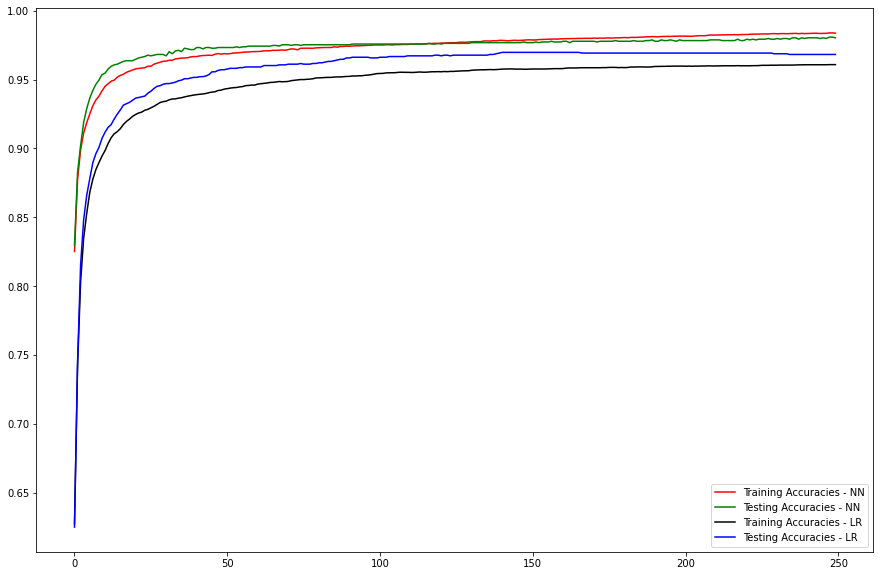

In [24]:
#comparing the results of NN and LR
plt.figure(figsize=(15,10))

# Neural Network plots
plt.plot(acc_nn.accuracies, 'r-', label = "Training Accuracies - NN")
plt.plot(acc_nn.test_accuracies, 'g-', label = "Testing Accuracies - NN")

# Logistic Regression plots
plt.plot(acc_lr.accuracies, 'k-', label = "Training Accuracies - LR")
plt.plot(acc_lr.test_accuracies, 'b-', label = "Testing Accuracies - LR")
plt.legend()

#### Plotting the outputs of this layer of the NN.


In [25]:
new_model = Model(layers[:-2])
testing_plot = new_model(testing_data_x)

Text(0.5, 1.0, 'Outputs')

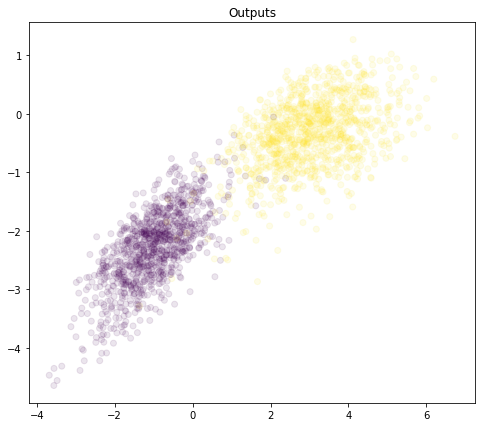

In [26]:
# Plotting the scatter plot of points and color coding by class
plt.figure(figsize=(8,7))
plt.scatter(testing_plot[:,0], testing_plot[:,1], alpha = 0.1, c = y_test.ravel());
plt.title('Outputs')

Probability contours

In [27]:
model_prob = Model(layers[-2:]) 

In [28]:
#creating the x and y ranges according to the above generated plot.
x_range = np.linspace(-4, 1, 100) 
y_range = np.linspace(-6, 6, 100) 
x_grid, y_grid = np.meshgrid(x_range, y_range) # x_grid and y_grig are of size 100 X 100

# converting x_grid and y_grid to continuous arrays
x_gridflat = np.ravel(x_grid)
y_gridflat = np.ravel(y_grid)

# The last layer of the current model takes two columns as input. Hence transpose of np.vstack() is required.
X = np.vstack((x_gridflat, y_gridflat)).T

prob_contour = model_prob(X).reshape(100,100) 

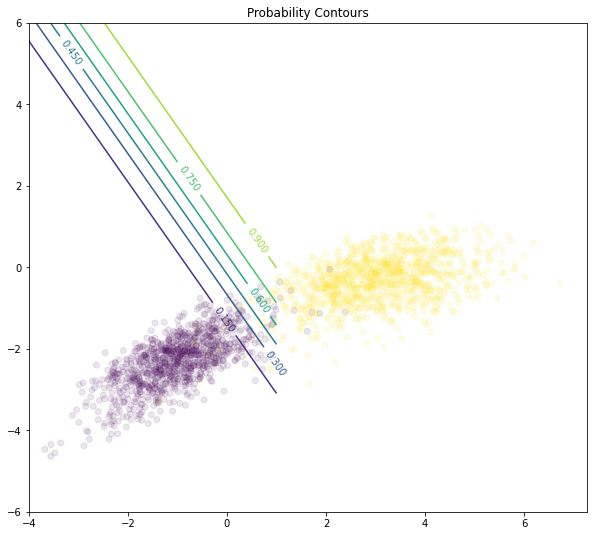

In [29]:
plt.figure(figsize=(10,9))
plt.scatter(testing_plot[:,0], testing_plot[:,1], alpha = 0.1, c = y_test.ravel())
contours = plt.contour(x_grid,y_grid,prob_contour)
plt.title('Probability Contours')
plt.clabel(contours, inline = True );